In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:


import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')



In [3]:
paths =[]
labels=[]

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label= filename.split('_')[-1]
        label=label.split('.')[0].lower()
        labels.append(label)
        
        
print('Dataset is loaded')


Dataset is loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
df=pd.DataFrame()
df['speech']=paths
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

In [8]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectrogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()


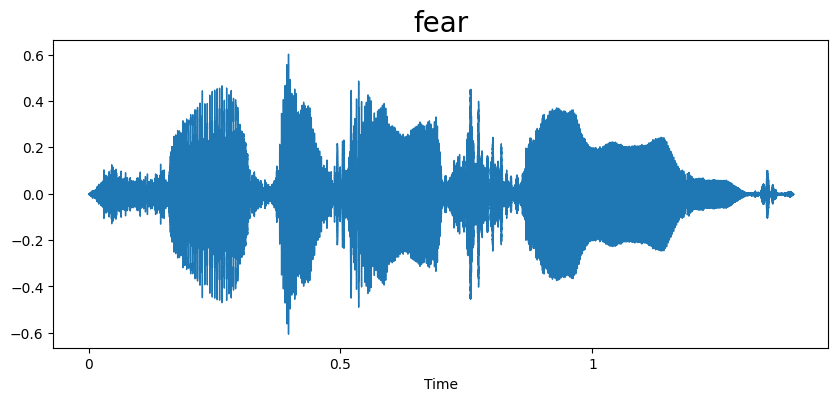

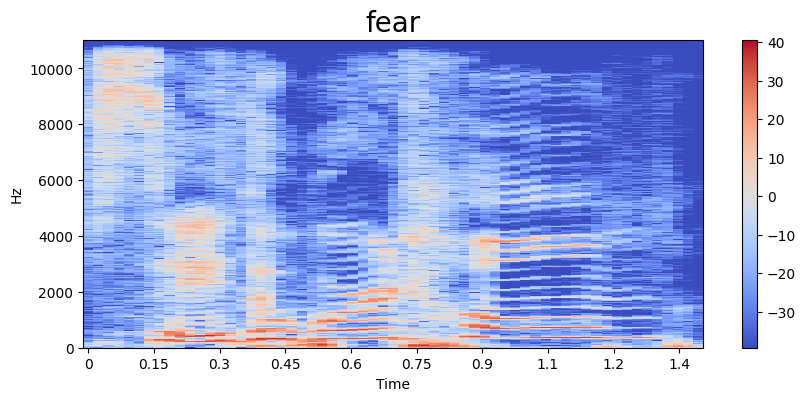

In [9]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

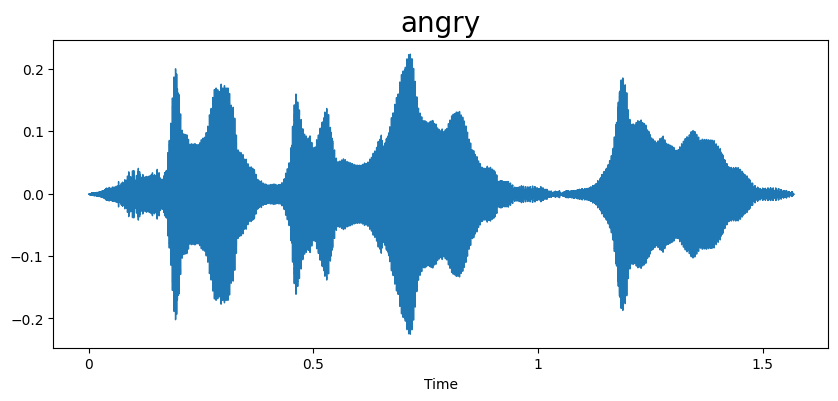

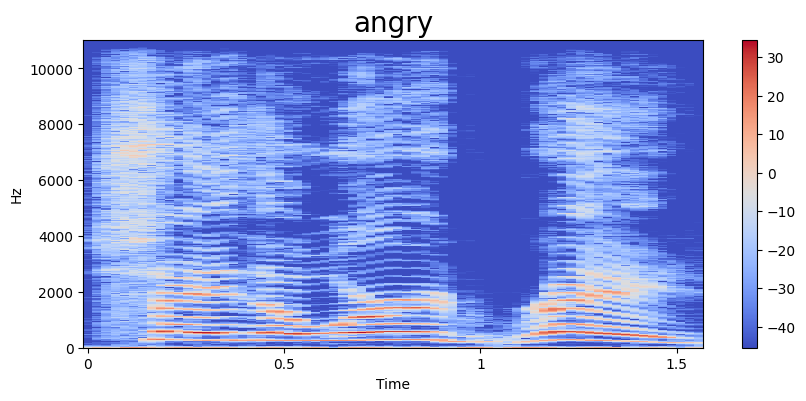

In [10]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

In [11]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [12]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689117,   22.125532 ,
        -14.757396 ,   11.051347 ,   12.412449 ,   -3.000262 ,
          1.0844985,   11.078271 ,  -17.41966  ,   -8.093213 ,
          6.5879736,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.57464  ,   16.325033 ,   -3.8427284,    0.8962967,
        -11.239264 ,    6.653461 ,   -2.5883694,   -7.7140164,
        -10.941657 ,   -2.4007552,   -5.2812862,    4.271157 ,
        -11.202216 ,   -9.024621 ,   -3.666985 ,    4.8697433,
         -1.6027987,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [13]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))
x_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413284, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505877, 8.431058, -...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54886, 77.88605, -15.224756, 2.194633, -...
5598    [-353.1474, 101.68391, -14.175897, -12.037376,...
5599    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: speech, Length: 5600, dtype: object

In [14]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(5600, 40)

In [15]:
x=np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [17]:
y=y.toarray()

In [18]:
y.shape

(5600, 7)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history=model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.2511 - loss: 1.8898 - val_accuracy: 0.1884 - val_loss: 1.9295
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.5058 - loss: 1.5689 - val_accuracy: 0.2313 - val_loss: 1.9024
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.6282 - loss: 1.1206 - val_accuracy: 0.2170 - val_loss: 1.6413
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.7142 - loss: 0.8110 - val_accuracy: 0.5589 - val_loss: 1.0390
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.7773 - loss: 0.6286 - val_accuracy: 0.7616 - val_loss: 0.6710
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8402 - loss: 0.4625 - val_accuracy: 0.8286 - val_loss: 0.4626
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8726 - loss: 0.3631 - val_accuracy: 0.8705 - val_loss: 0.3475
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9005 - loss: 0.3028 - val_accuracy: 0.8679 - v

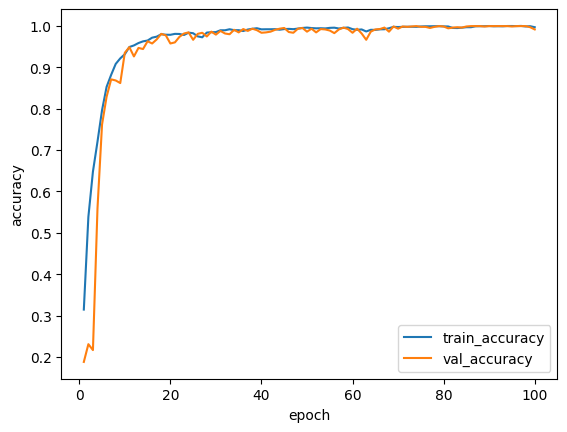

In [21]:
epoch=range(1,101)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epoch,acc,label='train_accuracy')
plt.plot(epoch,val_acc,label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
